# DATA VISUALIZATION / VALIDATION

In [1]:
# common
import os, sys

# append sscode to path
sys.path.insert(0, os.path.join(os.path.abspath(''), '..'))

# data viewer
from sscode.data import Loader
from sscode.data import load_moana_hindcast, load_codec_hindcast, \
    join_load_uhslc_tgs, load_geocean_tgs, load_moana_hindcast_ss, \
    load_cfsr, load_era5
from sscode.plotting.data import plot_all_data
from sscode.plotting.utils import plot_ccrs_nz

# warnings
import warnings
warnings.filterwarnings('ignore')

## plot all available data


 loading the Moana v2 hindcast data... 


 loading the Moana v2 hindcast data (ss)... 


 loading and plotting the UHSLC tidal guages... 


 loading the sea-level-pressure fields... 

 cropping the data to 2003 


 projected winds will not be calculated... returning the SLP... 



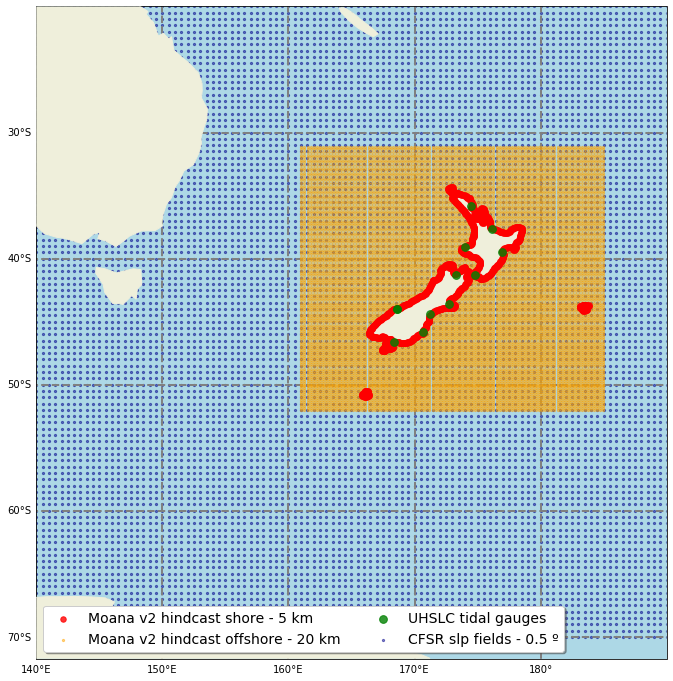

In [2]:
plot_all_data(moana_hind=load_moana_hindcast(),
              moana_hind_all=load_moana_hindcast_ss(daily=False),
              uhslc_tgs=join_load_uhslc_tgs(),
              pres_cfsr=load_cfsr(time='2003')[0])

## load and validate the data


 loading the sea-level-pressure fields... 


 loading daily resampled data... 



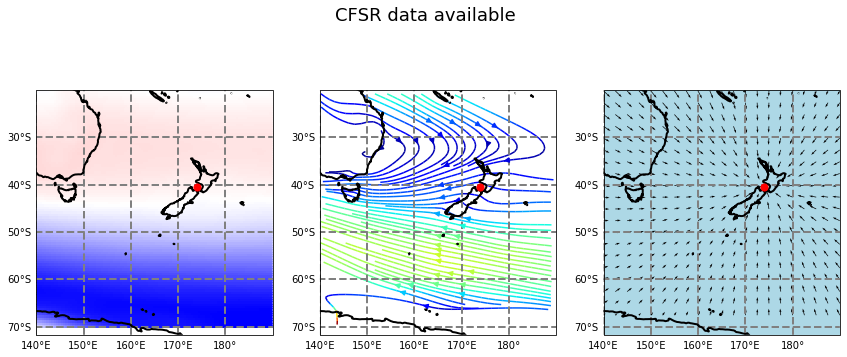


 loading the Moana v2 hindcast data... 



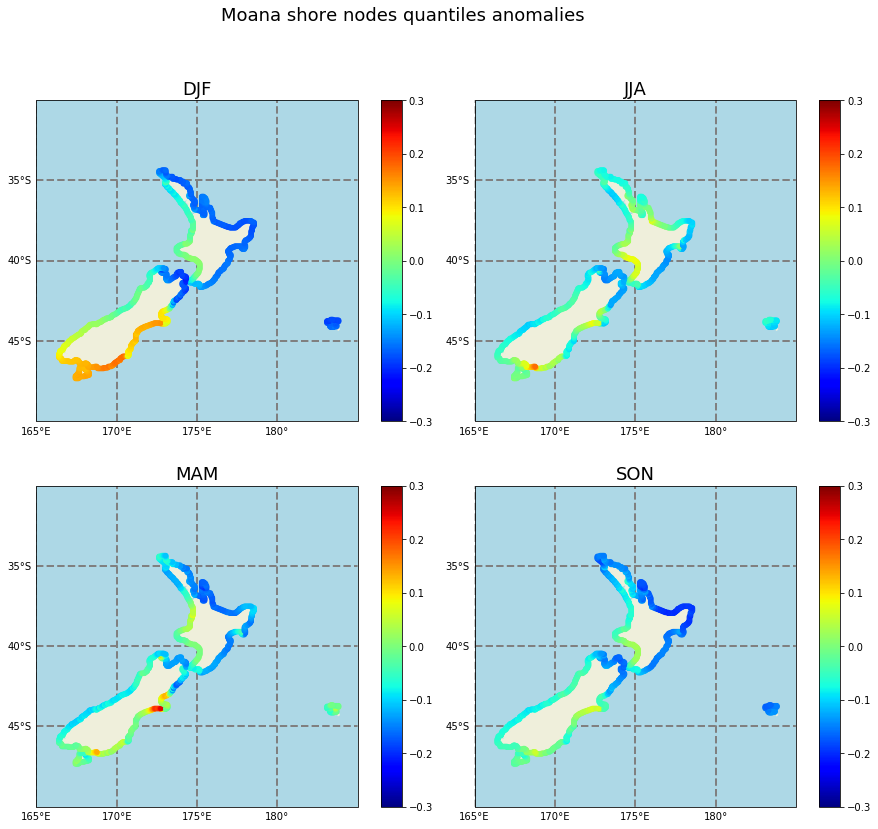


 loading and plotting the UHSLC tidal guages... 



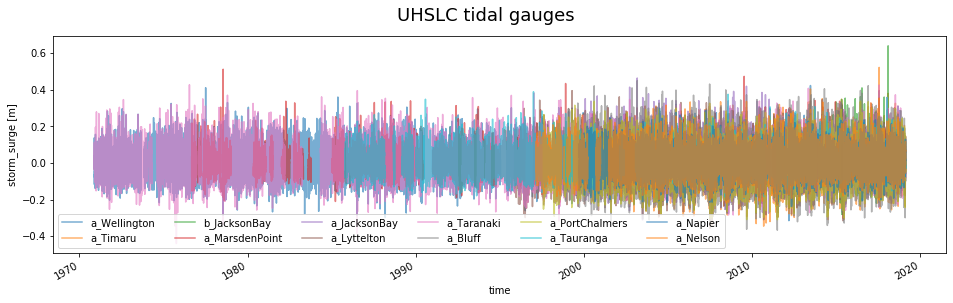

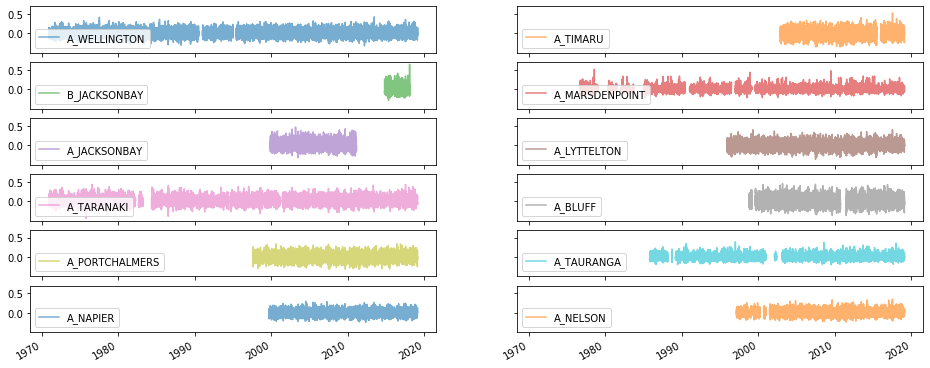


 Lets compare data in Moana v2 hindcast with UHSLC tgs!! 


 
 TGs to analyze are: 
 ['a_Wellington' 'a_Timaru' 'b_JacksonBay' 'a_MarsdenPoint' 'a_JacksonBay'
 'a_Lyttelton' 'a_Taranaki' 'a_Bluff' 'a_PortChalmers' 'a_Tauranga'
 'a_Napier' 'a_Nelson'] 


 which correspond to 
 [689, 328, 393, 1327, 393, 480, 999, 116, 224, 1124, 949, 708] 
 in Moana v2 hindcast 


 calculated min distances (km) in Moana v2 hindcast to UHSLC tgs: 
 [10.091858550595918, 5.125532152668501, 6.8976210810727725, 7.807937095794991, 6.8976210810727725, 8.749086655427975, 0.7284939428835768, 2.827544577707935, 8.837335750916106, 4.69880874581877, 1.8441234559361168, 4.255617965386278] 



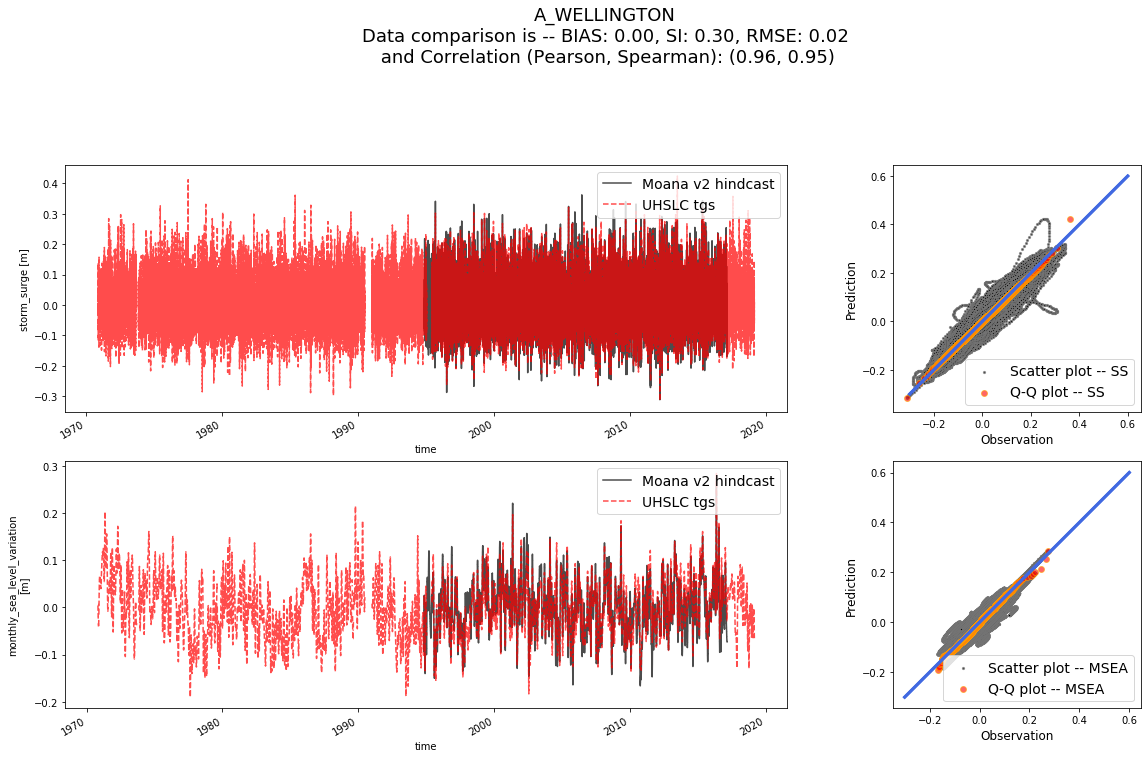

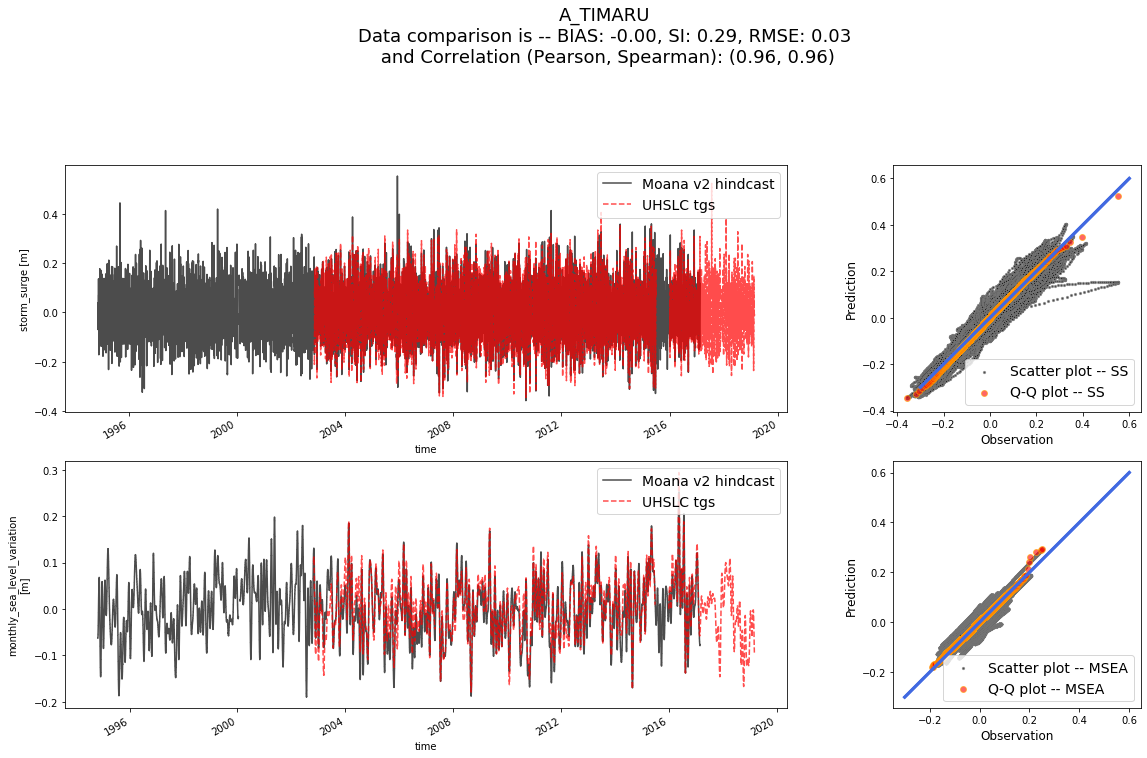

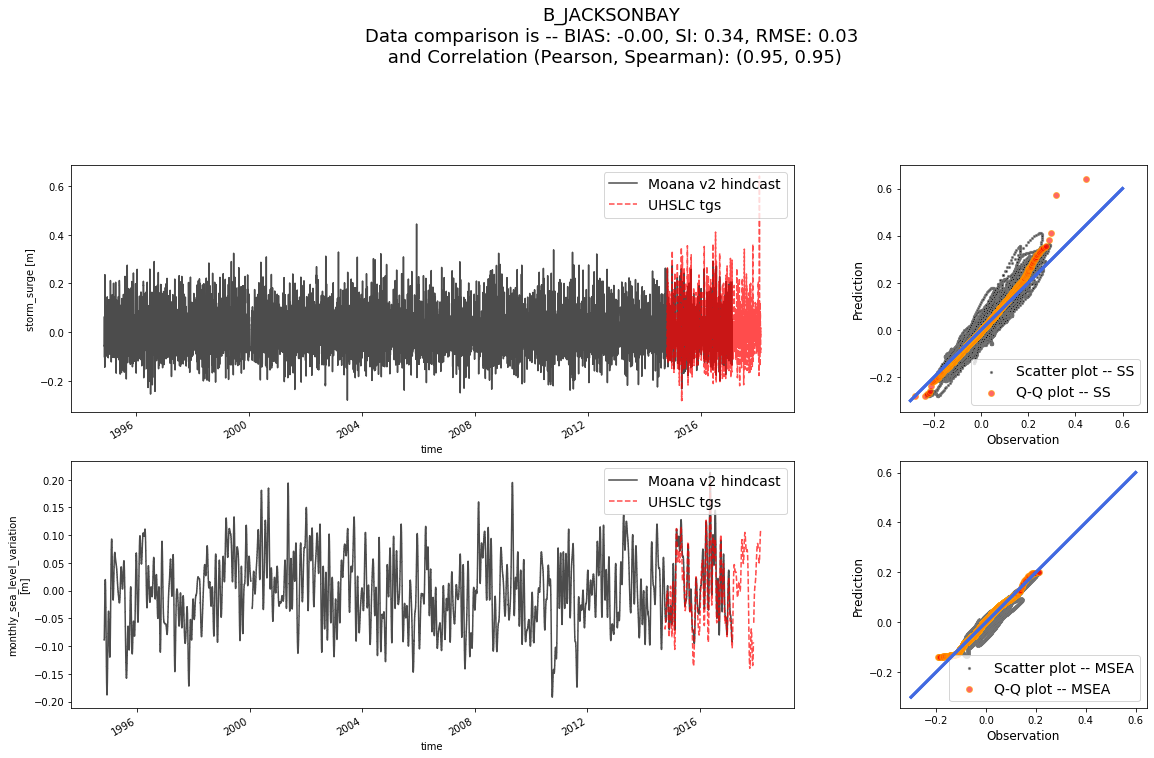

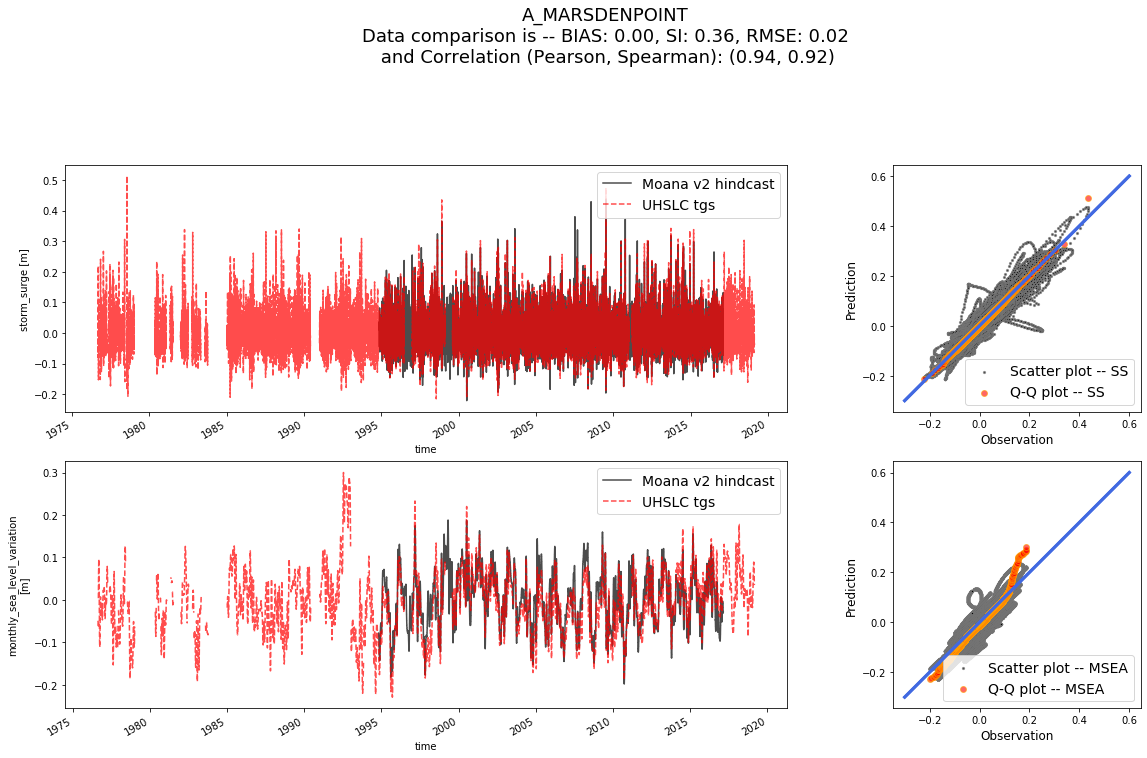

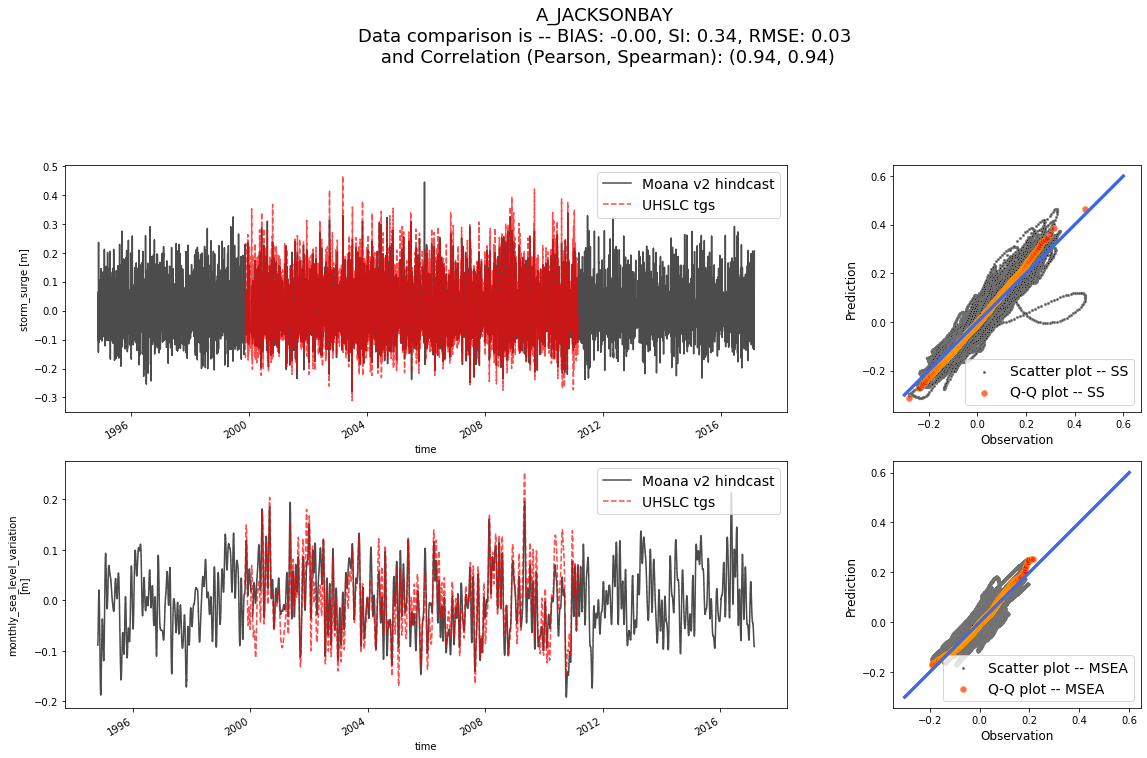

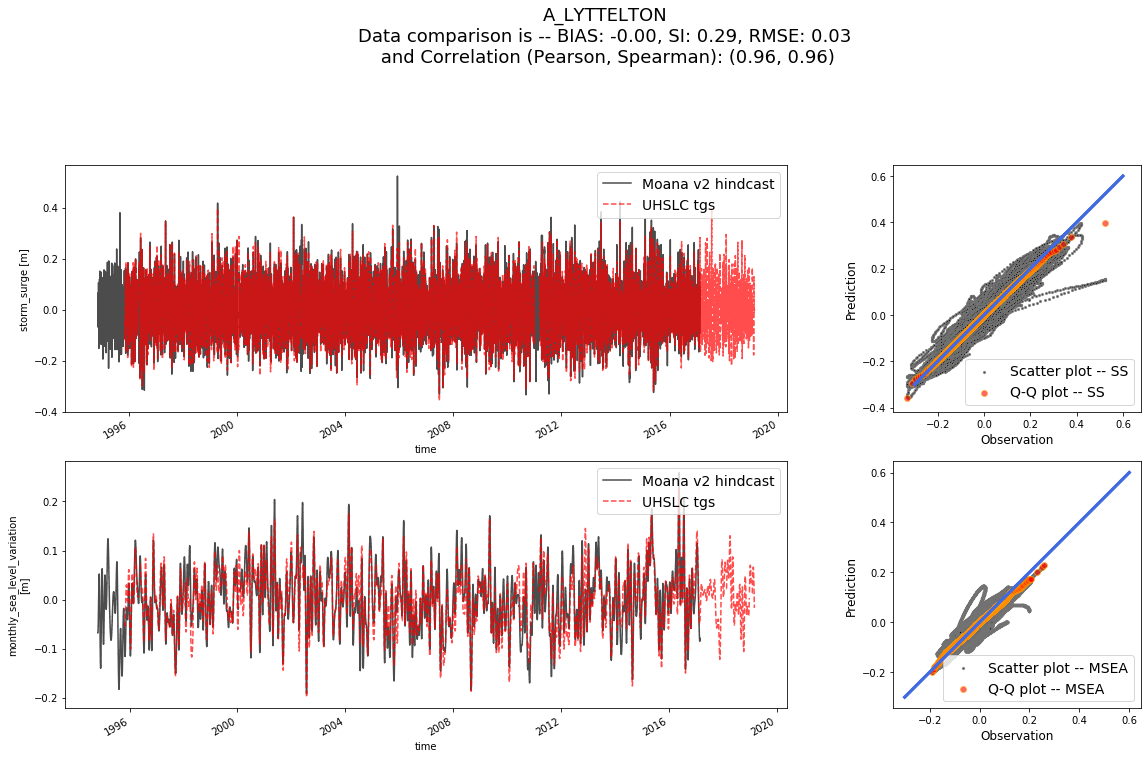

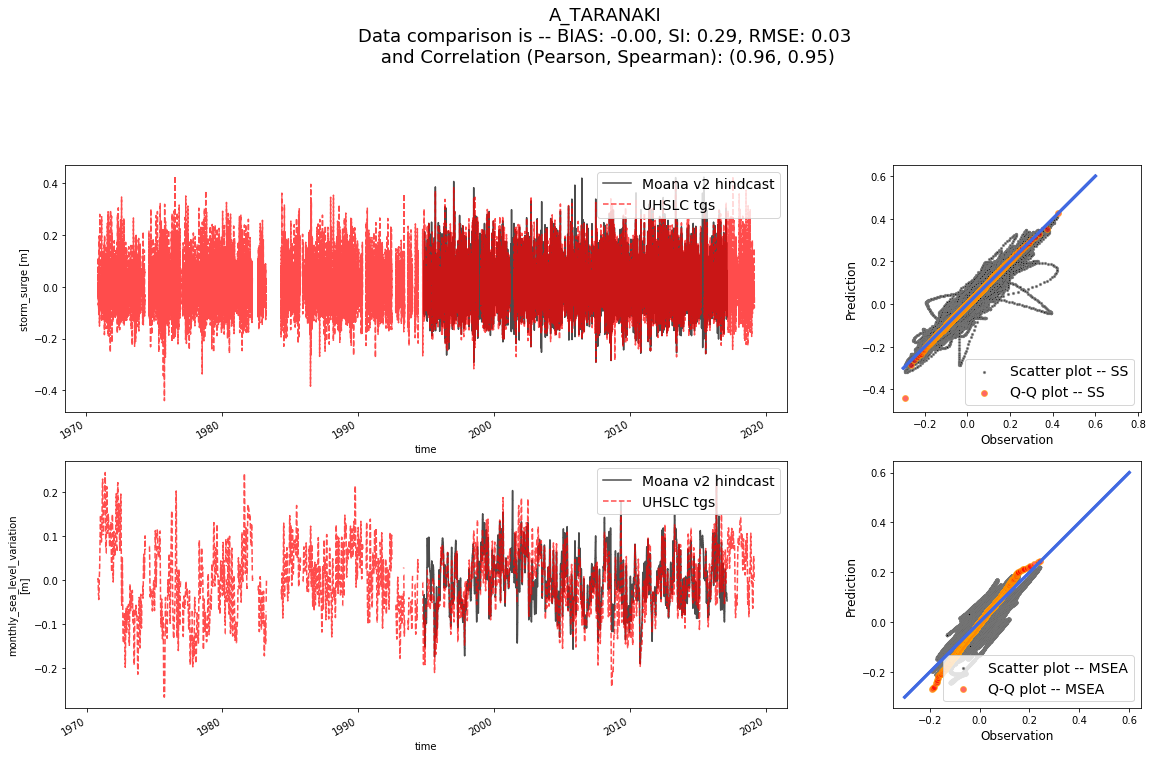

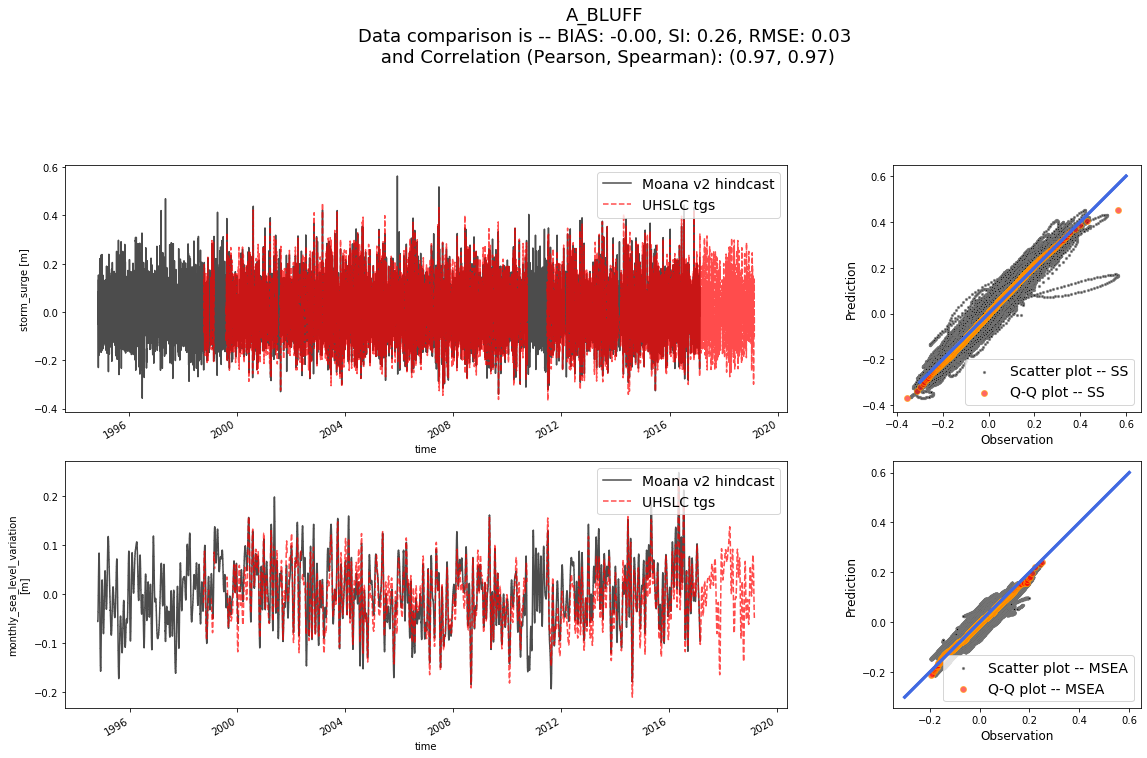

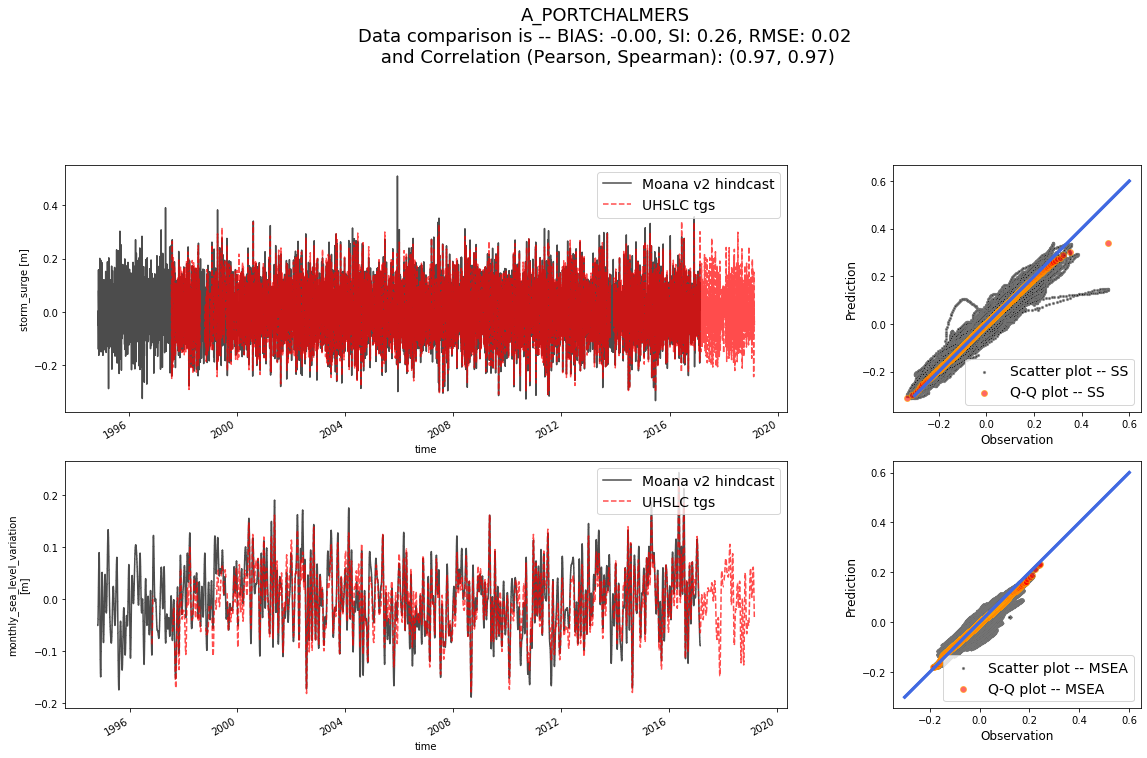

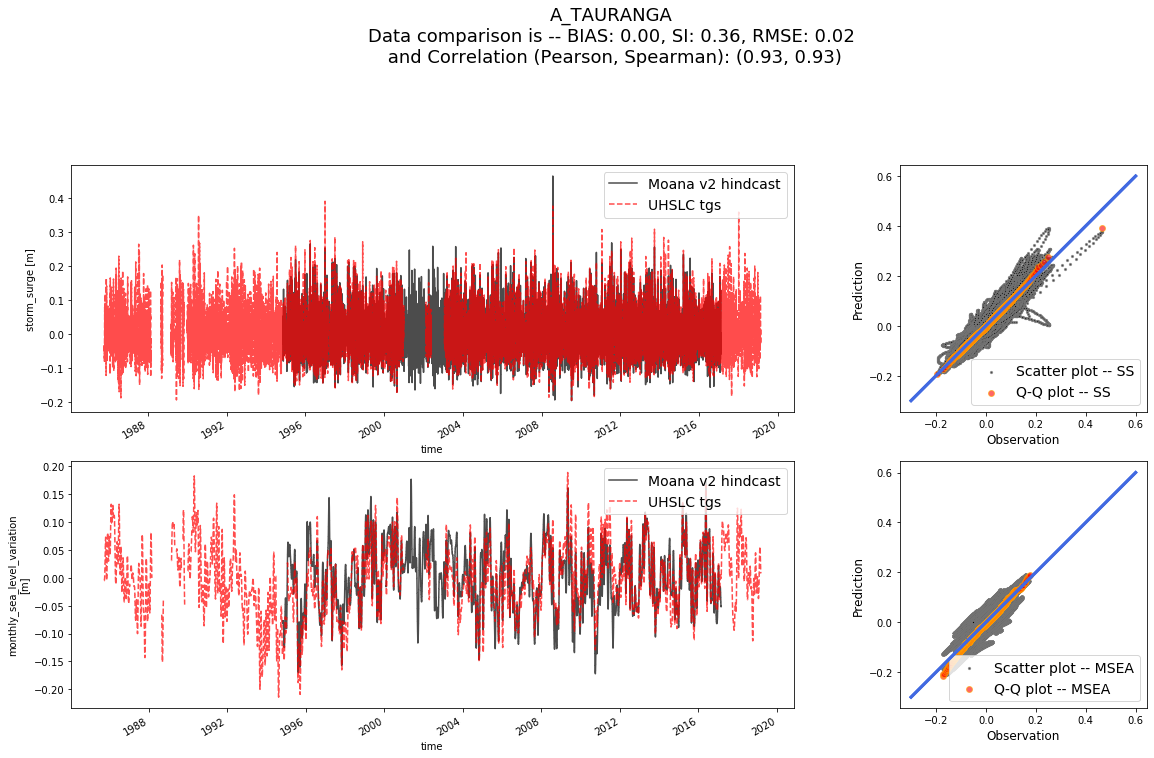

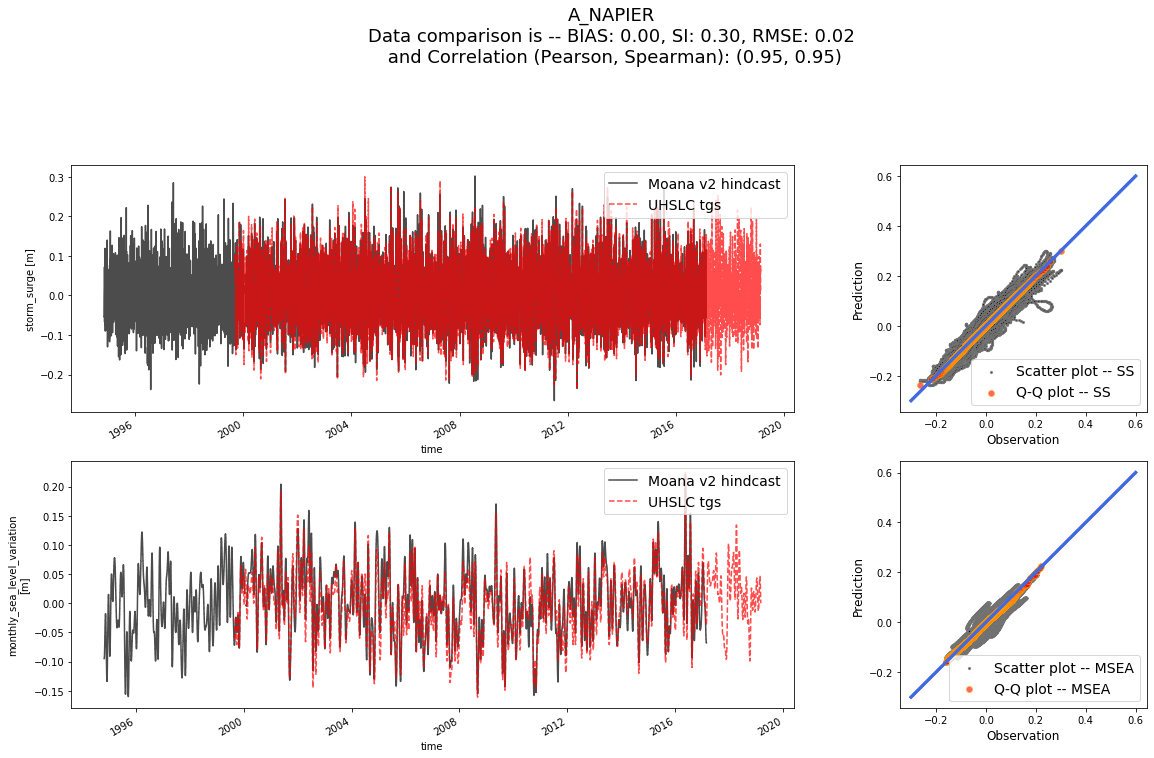

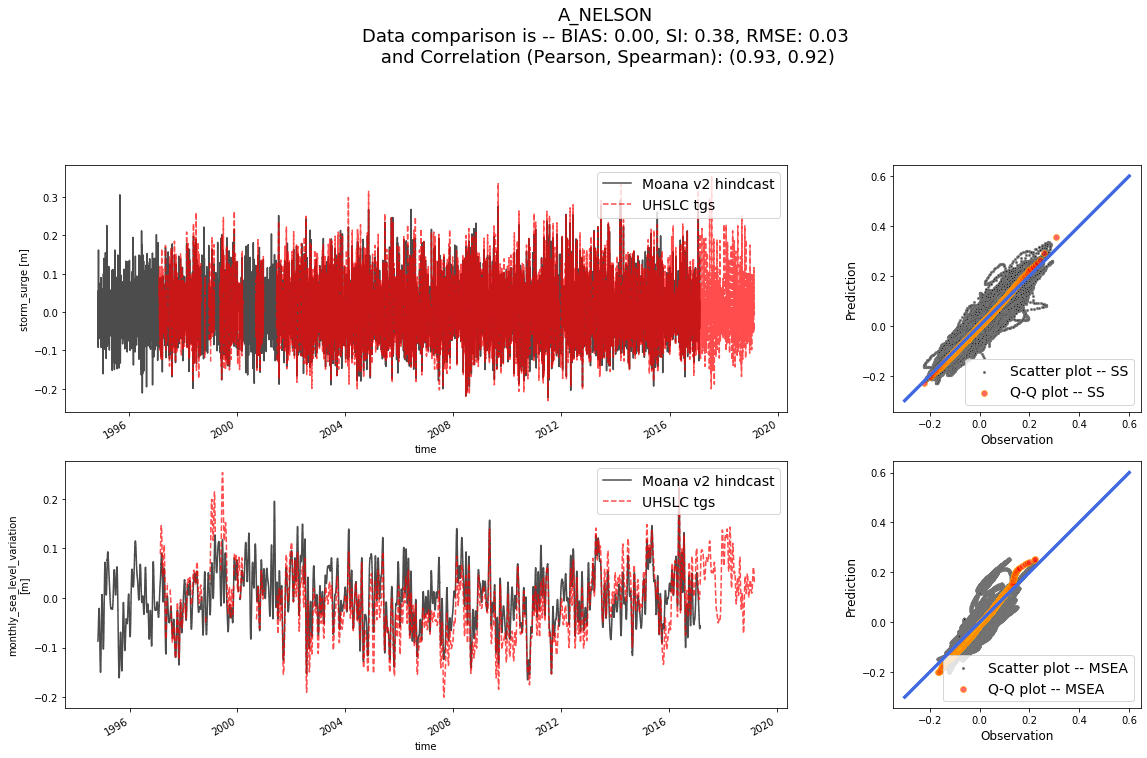

In [3]:
# load the data
load_cfsr_moana_uhslc = Loader(
    data_to_load=['cfsr','moana','uhslc']
)

# validate the data
load_cfsr_moana_uhslc.validate_datasets(
    comparison_variables=[['ss','msea'],['ss','msea']]
)

In [4]:
load_cfsr_moana_uhslc.predictand_reduced

<xarray.Dataset>
Dimensions:   (site: 12, time: 209736)
Coordinates:
  * site      (site) int64 689 328 393 1327 393 480 999 116 224 1124 949 708
  * time      (time) datetime64[ns] 1994-01-17 ... 2017-12-09
    tg_names  (site) object 'a_Wellington' 'a_Timaru' ... 'a_Napier' 'a_Nelson'
Data variables:
    elev      (site, time) float32 dask.array<chunksize=(1, 104868), meta=np.ndarray>
    lat       (site) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    lon       (site) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    msea      (site, time) float32 dask.array<chunksize=(1, 104868), meta=np.ndarray>
    res       (site, time) float32 dask.array<chunksize=(1, 104868), meta=np.ndarray>
    ss        (site, time) float32 nan nan nan nan nan ... nan nan nan nan nan
    tide      (site, time) float32 dask.array<chunksize=(1, 104868), meta=np.ndarray>
    trend     (site, time) float32 dask.array<chunksize=(1, 104868), meta=np.ndarray>
    bias      (site) float64 9.83e-05 -6.339e-05 ... 0.0003021 0.0002892
    si        (site) float64 0.299 0.2932 0.3447 0.3595 ... 0.3616 0.3018 0.38
    rmse      (site) float64 0.02485 0.03094 0.0347 ... 0.02198 0.0222 0.02726
    pearson   (site) float64 0.9566 0.9561 0.9484 0.9359 ... 0.934 0.9541 0.9252
    spearman  (site) float64 0.9534 0.9575 0.9498 0.923 ... 0.9277 0.9516 0.92

## validation statistics

In [5]:
# imports
import numpy as np
import pandas as pd
import plotly.graph_objects as go

# table
moana_uhslc = pd.DataFrame(
    data=np.array(load_cfsr_moana_uhslc.ss_stats),
    columns=['bias','si','rmse','pearson','spearman'],
    index=load_cfsr_moana_uhslc.validator.name.values
)
fig = go.Figure(data=[go.Table(
    header=dict(values=['UHSLC tgs']+list(moana_uhslc.columns),
                fill_color='lightblue',
                align='center',
                font=dict(color='black',size=18)),
    cells=dict(values=moana_uhslc.round(decimals=5).reset_index().T,
               fill_color='lavender',
               align='center',
               font=dict(color='black',size=12)))])
fig.update_layout(title='Comparison between UHSLC and Moana')
fig.show()